In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [3]:
age_grups_incidence = pd.read_csv("/home/zhukowych/Projects/ucu/econometrics/cancer_incidence/final_dataset/age_group_incidence.csv")

/tmp/ipykernel_15168/2275460444.py:1: DtypeWarning: Columns (9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  age_grups_incidence = pd.read_csv("/home/zhukowych/Projects/ucu/econometrics/cancer_incidence/final_dataset/age_group_incidence.csv")


In [4]:
age_groups = ["до 1 р.", "1-4 р.", "5-9 р.", "10-14р", "15-19р", 
              "в т.ч. 15-17р",	"20-24р",	"25-29р", "30-34р",
              "35-39р", "40-44р", "45-49р", "50-54р", "55-59р", 
              "60-64р", "65-69р",	"70-74р",	"75-79р",	"80-84р",	"85 та старші"]

age_group_df = [age_grups_incidence[age_grups_incidence["age_group"] == group] for group in age_groups]

In [5]:
man_groups_incidence = [ df[df['category_x'] == "Злоякiснi новоутворення-всього         C00-C97    ч"] for df in age_group_df ][11:]

In [6]:

def plot_regions_panel(dfs, column_name, title):
    regions = list(dfs[0]['region'].unique())
    regions.remove("м.Севастополь")
    regions.remove("м.Київ")
    fig, ax = plt.subplots(5, 5, figsize=(16, 10))

    fig.suptitle(title)

    for i, region in enumerate(regions):
        n, m = i // 5, i % 5
        for df in dfs:
            regions_ts = df[df['region'] == region]
            sns.lineplot(x=regions_ts['year'], y=regions_ts[column_name], linewidth=2.5, color='b', marker='o', markersize=5, ax=ax[n, m])
        ax[n, m].set_title(region)
        ax[n, m].set_xticks([])
        ax[n, m].set_yticks([])
        ax[n,m].set_xlabel("")  
        ax[n,m].set_ylabel("")  

    plt.show()

def plot_one_region_ts(dfs, column_name, title, region):
    plt.figure(figsize=(12, 6))

    for df in dfs:
        region_ts = df[df["region"] == region]
        print(region_ts[column_name])
        sns.lineplot(x=df['year'], y=region_ts[column_name], linewidth=2.5, color='b', marker='o', markersize=5)

    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()


In [10]:

reduced = age_grups_incidence.drop_duplicates(subset=["year", "region"], keep="first")


81360      527090
210180     526821
271200     536020
386460     539255
515280     543959
549192     549056
576327     546553
637347     541848
698367     538212
759387     515722
820407     504824
881427     486904
942447     312620
1003467    368521
1064487    430681
1125507    521834
Name: nill, dtype: int64


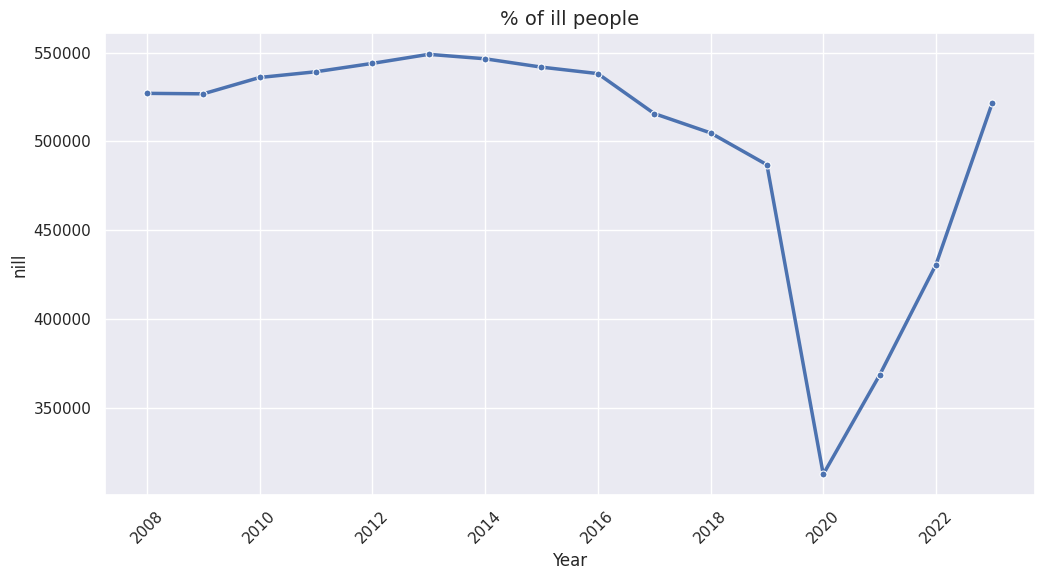

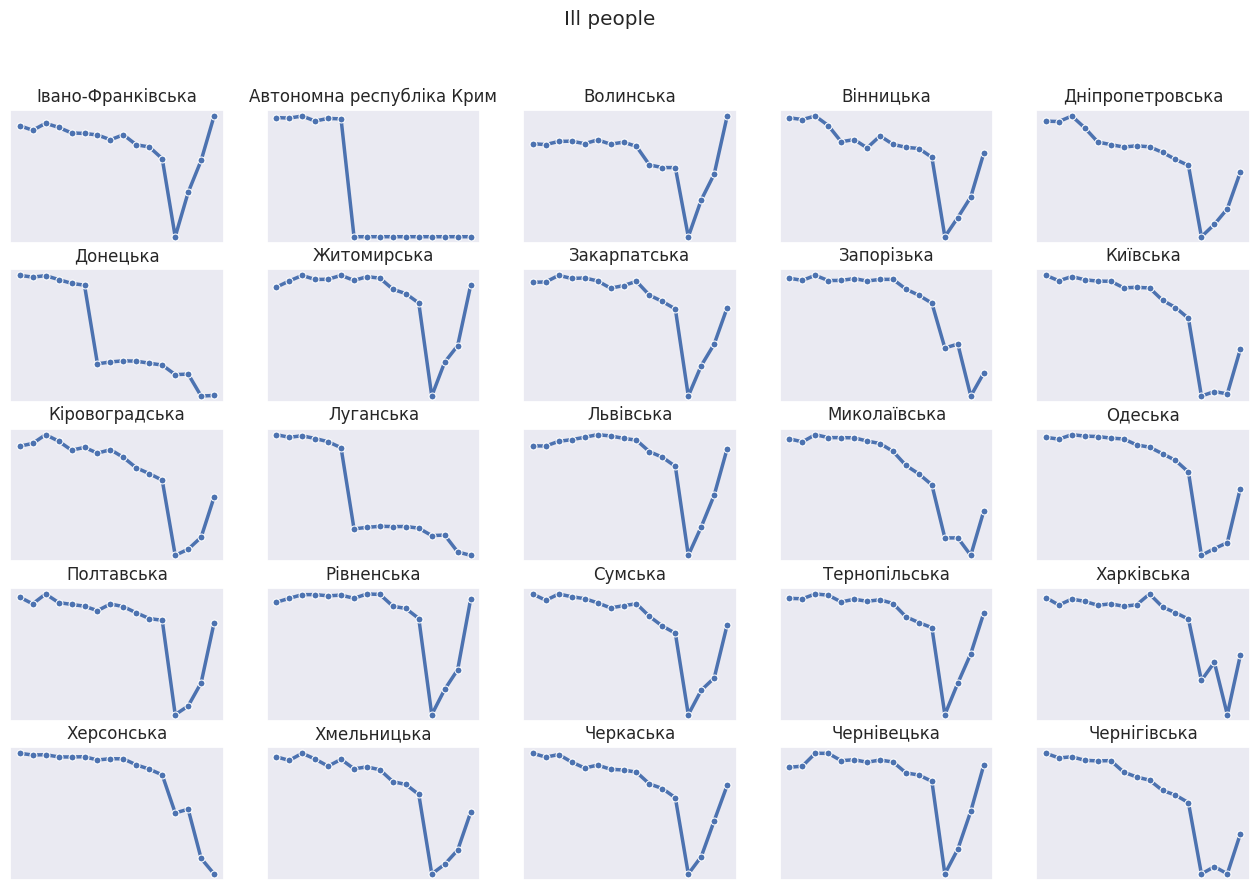

In [16]:
plot_one_region_ts([reduced], "nill", "% of ill people", "Львівська")
plot_regions_panel([reduced], "nill", "Ill people")